<a href="https://colab.research.google.com/github/elliot-linsey/QMUL/blob/main/Machine%20Learning/Coursework%203%20pt%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

In [63]:
stocks = pd.read_csv('stocks.csv', header='infer') 
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'],axis=1)
stocks.head()

,MSFT,F,BAC
Date,,,
1/3/2007,29.860001,7.51,53.330002
1/4/2007,29.809999,7.70,53.669998
1/5/2007,29.639999,7.62,53.240002
1/8/2007,29.930000,7.73,53.450001
1/9/2007,29.959999,7.79,53.500000


In [64]:
N,d = stocks.shape
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values, stocks.iloc[:N-1,:].values),
                    columns=stocks.columns, index=stocks.iloc[1:].index)
delta.head()

,MSFT,F,BAC
Date,,,
1/4/2007,-0.167455,2.529960,0.637532
1/5/2007,-0.570278,-1.038961,-0.801185
1/8/2007,0.978411,1.443570,0.394438
1/9/2007,0.100231,0.776197,0.093543
1/10/2007,-1.001332,-0.770218,0.149536


In [65]:
X = delta.iloc[:,0:].to_numpy()
len(X)
X

array([[-0.16745478,  2.52996005,  0.63753232],
       [-0.57027845, -1.03896104, -0.80118505],
       [ 0.97841096,  1.44356955,  0.39443838],
       ...,
       [-0.45827592, -1.1299435 , -1.23839446],
       [-0.14287982, -0.16326531, -1.47783251],
       [-1.20827182, -0.81766149,  0.45454545]])

In [69]:
ee = OneClassSVM(nu=0.01,gamma='auto')
yhat = ee.fit_predict(X)
print(len(yhat))

2517


In [70]:
delta['y'] = yhat
delta.head()

,MSFT,F,BAC,y
Date,,,,
1/4/2007,-0.167455,2.529960,0.637532,1
1/5/2007,-0.570278,-1.038961,-0.801185,1
1/8/2007,0.978411,1.443570,0.394438,1
1/9/2007,0.100231,0.776197,0.093543,1
1/10/2007,-1.001332,-0.770218,0.149536,1


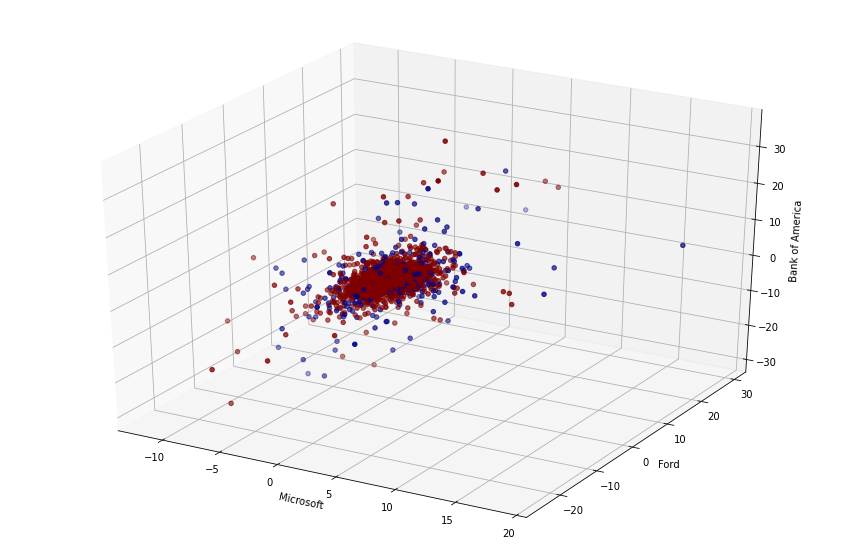

In [71]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta.MSFT,delta.F,delta.BAC,c=delta.y,cmap='jet')
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
plt.show()

In [90]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = pd.read_csv(url, header=None)
df

scaler = StandardScaler()
Z = scaler.fit_transform(df)
# Extracting the values from the dataframe
#data = df.values

# Split dataset into input and output elements
X, y = Z[:, :-1], Z[:, -1]

# Summarize the shape of the dataset
print(X.shape, y.shape)

(506, 13) (506,)


In [93]:
pca = PCA(n_components=2)
projected = pca.fit_transform(X)

projected = pd.DataFrame(projected,columns=['pc1','pc2'])
projected

,pc1,pc2
0,-2.098297,0.773112
1,-1.457252,0.591985
2,-2.074598,0.599639
3,-2.611504,-0.006871
4,-2.458185,0.097712
...,...,...
501,-0.314968,0.724284
502,-0.110513,0.759308
503,-0.312360,1.155246
504,-0.270519,1.041361


In [102]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance
import seaborn as sns
knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(df)
distances, indices = nbrs.kneighbors(df.values)

# The outlier score is set as the distance between the point and its k-th nearest neighbour
outlier_score = distances[:,knn-1]

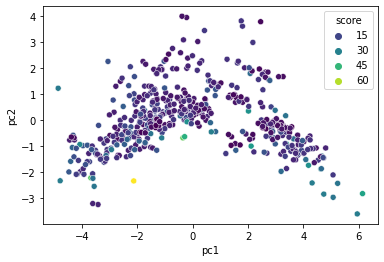

In [124]:
projected['score'] = outlier_score
palette = sns.color_palette("viridis",as_cmap=True)
ax = sns.scatterplot(data=projected,x='pc1',y='pc2',palette=palette,hue='score')